In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os
import h5py
import scipy.stats as st
# sys.path.insert(0,'/Users/saskiad/allensdk')

from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file='/Volumes/External Data/BrainObservatory/manifest.json',base_uri='http://testwarehouse:9000')

In [2]:
analysis_path = r'/Volumes/External Data/Analysis_Files'

In [3]:
# DataCube = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/DataCube_October.csv')
DataCube = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/DataCube.csv')

# metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/metrics_October_trim.csv')
metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/metrics.csv')

# Methods
### 1. Roth
- response measured with 6 points (1.5sec) around peak, using a 5 second baseline  
- response bigger than baseline + 3* stdev
- in 50% of trials
- responses must be bigger than 5% (= 1 spike in OGB)
- r-square value >0.7 for Gaussian fit to either SF or TF

### 2. Tohmi
- maximum fluorescence change > 4%.  

### 3. Andermann
- t-test with Bonferronni correction (p<0.05/n)

### 4. Marshel
- mean DF/F > 6% to any stimulus
- reliability >1: (mean_max - mean_blank)/(std_max + std_blank)

### 5. Sun
- DF/F > 10%

### 6. sdv
- baseline is the second half of the intersweep preceding the grating trial
- mean response during grating sweep larger than baseline + 2*stdev (95%)
- 4 trials (of 15) meet this criteria

### 7. Bandyopadhyay
- significant mean response based on 95% confidence intervals (from bootstrap resampling)
- single trials were responsive if DF/F crosed 1.96 s.d. of each frame

In [4]:
tfvals = [0,1,2,4,8,15]
orivals = range(0,360,45)

In [103]:
session_A = DataCube.session_A.iloc[0]

In [104]:
data_set = boc.get_ophys_experiment_data(session_A)
specimen_ids_A = data_set.get_cell_specimen_ids()
analysis_file = os.path.join(analysis_path, str(session_A)+'_three_session_A_analysis.h5')
sweep_response = pd.read_hdf(analysis_file, 'analysis/sweep_response_dg')
mean_sweep_response = pd.read_hdf(analysis_file, 'analysis/mean_sweep_response_dg')
stim_table = pd.read_hdf(analysis_file, 'analysis/stim_table_dg')
peak = pd.read_hdf(analysis_file, 'analysis/peak')

In [105]:
peak.keys()

Index([u'speed_max_sp', u'speed_min_sp', u'ptest_sp', u'mod_sp',
       u'speed_max_vis', u'speed_min_vis', u'ptest_vis', u'mod_vis', u'ori_dg',
       u'tf_dg', u'reliability_dg', u'osi_dg', u'dsi_dg', u'peak_dff_dg',
       u'ptest_dg', u'p_run_dg', u'run_modulation_dg', u'cv_os_dg',
       u'cv_ds_dg', u'tf_index_dg', u'cell_specimen_id', u'peak_nm1',
       u'response_reliability_nm1', u'peak_nm3', u'response_reliability_nm3',
       u'imaging_depth_um', u'fov', u'genotype', u'ophys_experiment_id',
       u'session_type', u'specimen_name', u'pipeline_version',
       u'excitation_lambda', u'indicator', u'sex', u'device',
       u'experiment_container_id', u'targeted_structure', u'cre_line',
       u'device_name', u'age_days', u'session_start_time'],
      dtype='object')

In [23]:
data_set = boc.get_ophys_experiment_data(session_A)


In [28]:
(ts, celltraces) = data_set.get_fluorescence_traces()

In [29]:
celltraces.shape

(88, 115474)

In [36]:
temp = celltraces[2,:]

In [31]:
print temp.mean()
print temp.std()

208.373
10.7646


In [37]:
(_,p)=st.normaltest(temp)
print p

0.0


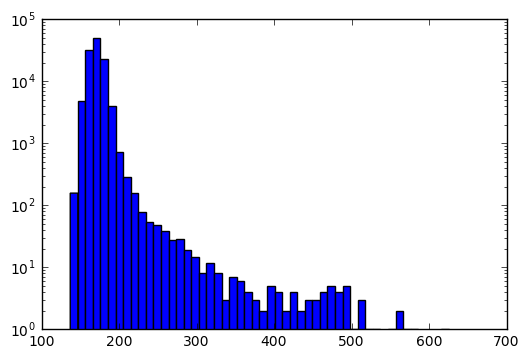

In [40]:
plt.hist(temp, bins=50)
plt.yscale('log')

In [107]:
peak.keys()

Index([u'speed_max_sp', u'speed_min_sp', u'ptest_sp', u'mod_sp',
       u'speed_max_vis', u'speed_min_vis', u'ptest_vis', u'mod_vis', u'ori_dg',
       u'tf_dg', u'reliability_dg', u'osi_dg', u'dsi_dg', u'peak_dff_dg',
       u'ptest_dg', u'p_run_dg', u'run_modulation_dg', u'cv_os_dg',
       u'cv_ds_dg', u'tf_index_dg', u'cell_specimen_id', u'peak_nm1',
       u'response_reliability_nm1', u'peak_nm3', u'response_reliability_nm3',
       u'imaging_depth_um', u'fov', u'genotype', u'ophys_experiment_id',
       u'session_type', u'specimen_name', u'pipeline_version',
       u'excitation_lambda', u'indicator', u'sex', u'device',
       u'experiment_container_id', u'targeted_structure', u'cre_line',
       u'device_name', u'age_days', u'session_start_time'],
      dtype='object')

In [61]:
numbercells = len(specimen_ids_A)

In [6]:
table = pd.DataFrame(columns=('specimen_id','pref_ori','pref_tf','peak_dff','max_dff','tohmi','andermann','marshel','roth', 'reliability', 'p_blank', 'criteria'), index=range(numbercells))


NameError: name 'numbercells' is not defined

Create dataframe of different responsive criteria

In [5]:
for index,row in DataCube.iterrows():
    print index
    session_A = row.session_A
    data_set = boc.get_ophys_experiment_data(session_A)
    specimen_ids_A = data_set.get_cell_specimen_ids()
    (ts, celltraces) = data_set.get_fluorescence_traces()
    analysis_file = os.path.join(analysis_path, str(session_A)+'_three_session_A_analysis.h5')
    sweep_response = pd.read_hdf(analysis_file, 'analysis/sweep_response_dg')
    mean_sweep_response = pd.read_hdf(analysis_file, 'analysis/mean_sweep_response_dg')
    stim_table = pd.read_hdf(analysis_file, 'analysis/stim_table_dg')
    peak = pd.read_hdf(analysis_file, 'analysis/peak')
    numbercells = len(specimen_ids_A)
    table = pd.DataFrame(columns=('specimen_id','pref_ori','pref_tf','peak_dff','dsi','osi','cv_ds','cv_os', 'response_reliability','max_dff','tohmi','andermann','marshel','roth','anatolik', 'reliability', 'p_blank', 'criteria'), index=range(numbercells))
    
    for nc,v in enumerate(specimen_ids_A):
        table.specimen_id.iloc[nc] = v
        pref_ori = orivals[peak.ori_dg.iloc[nc]]
        pref_tf = tfvals[peak.tf_dg.iloc[nc]]
        peak_dff = peak.peak_dff_dg.iloc[nc]
        table.pref_ori.iloc[nc] = pref_ori
        table.pref_tf.iloc[nc] = pref_tf
        table.peak_dff.iloc[nc] = peak_dff
        table.dsi.iloc[nc] = peak.dsi_dg.iloc[nc]
        table.osi.iloc[nc] = peak.osi_dg.iloc[nc]
        table.cv_ds.iloc[nc] = peak.cv_ds_dg.iloc[nc]
        table.cv_os.iloc[nc] = peak.cv_os_dg.iloc[nc]
        table.response_reliability.iloc[nc] = peak.reliability_dg.iloc[nc]
        peak_resp = mean_sweep_response[(stim_table.orientation==pref_ori)&(stim_table.temporal_frequency==pref_tf)][str(nc)].values
        blank_resp = mean_sweep_response[stim_table.temporal_frequency==0][str(nc)].values

        (_,p) = st.ttest_ind(peak_resp, blank_resp)
        if p<(0.05/40):
            andermann = True
        else:
            andermann = False
        table.andermann.iloc[nc] = andermann
        table.p_blank.iloc[nc] = p

        reliability = (peak_resp.mean() - blank_resp.mean())/(peak_resp.std() + blank_resp.std())
        if (peak_dff>6) & (reliability>1):
            marshel = True
#             if reliability > 1:
#                 marshel = True
#             else:
#                 marshel = False
        else:
            marshel=False
        table.marshel.iloc[nc] = marshel
        table.reliability.iloc[nc] = reliability

        subset = sweep_response[(stim_table.orientation==pref_ori)&(stim_table.temporal_frequency==pref_tf)][str(nc)]
        subset_mean = mean_sweep_response[(stim_table.orientation==pref_ori)&(stim_table.temporal_frequency==pref_tf)][str(nc)]
        mean_peak_resp = subset.mean()
        max_resp = mean_peak_resp[30:90].max()
        if max_resp>4:
            tohmi = True
        else:
            tohmi = False
        table.tohmi.iloc[nc] = tohmi
        table.max_dff.iloc[nc] = max_resp

        criteria = []
        for i in range(len(subset)):
            baseline = subset.iloc[i][:30]
            threshold = baseline.mean() + (3*baseline.std())
            response = subset.iloc[i][30:90]
            test1 = response.mean() > threshold
            test2 = subset_mean.iloc[i]>5
            criteria.append(np.logical_and(test1, test2))
        if (sum(criteria) > len(subset)/2):
            roth = True
        else:
            roth = False
        table.roth.iloc[nc] = roth
        table.criteria.iloc[nc] = sum(criteria)

        cell_mean = celltraces[nc,:].mean()
        cell_std = celltraces[nc,:].std()
        test_data = np.random.normal(loc=cell_mean, scale=cell_std, size=celltraces.shape[1])
        (_,p_norm) = st.ks_2samp(celltraces[nc,:], test_data)
        if p_norm<0.05:
            table.anatolik.iloc[nc] = True
        else:
            table.anatolik.iloc[nc] = False
        
    
    if index==0:
        table_all = pd.DataFrame(columns=('specimen_id','pref_ori','pref_tf','peak_dff','dsi','osi','cv_ds','cv_os', 'response_reliability','max_dff','tohmi','andermann','marshel','roth','anatolik', 'reliability', 'p_blank', 'criteria'))
    table_all = table_all.append(table)
    del table

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


In [6]:
for index,row in DataCube.iterrows():
    print index
    session_A = row.session_A
    data_set = boc.get_ophys_experiment_data(session_A)
    specimen_ids_A = data_set.get_cell_specimen_ids()
    (ts, celltraces) = data_set.get_fluorescence_traces()
    analysis_file = os.path.join(analysis_path, str(session_A)+'_three_session_A_analysis.h5')
    sweep_response = pd.read_hdf(analysis_file, 'analysis/sweep_response_dg')
    mean_sweep_response = pd.read_hdf(analysis_file, 'analysis/mean_sweep_response_dg')
    stim_table = pd.read_hdf(analysis_file, 'analysis/stim_table_dg')
    peak = pd.read_hdf(analysis_file, 'analysis/peak')
    numbercells = len(specimen_ids_A)
    table = pd.DataFrame(columns=('cell_specimen_id','criteria_sdv','sdv'), index=range(numbercells))
    
    for nc,v in enumerate(specimen_ids_A):
        table.cell_specimen_id.iloc[nc] = v
        pref_ori = orivals[peak.ori_dg.iloc[nc]]
        pref_tf = tfvals[peak.tf_dg.iloc[nc]]
        subset = sweep_response[(stim_table.orientation==pref_ori)&(stim_table.temporal_frequency==pref_tf)][str(nc)]
#         subset_blank = sweep_response[(stim_table.temporal_frequency==0)][str(nc)]
        
        criteria = []
        for i in range(len(subset)):
            baseline = subset.iloc[i][15:30] #start at 15 rather than 0
            threshold = baseline.mean() + (2*baseline.std())
            response = subset.iloc[i][30:90]
            criteria.append(response.mean() > threshold)
            if (sum(criteria) > 3):#>4 = 1/3 of trials. >3 = >20% of trials, really >=26% of trials
                sdv = True
            else:
                sdv = False
        table.criteria_sdv.iloc[nc] = sum(criteria)
        table.sdv.iloc[nc] = sdv
    
    if index==0:
        table_sdv4 = pd.DataFrame(columns=('cell_specimen_id','criteria_sdv','sdv'))
    table_sdv4 = table_sdv4.append(table)
    del table

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198


In [8]:
# print len(table_sdv)
# print len(table_sdv[table_sdv.sdv==True])
# print len(table_sdv2[table_sdv2.sdv==True]) #max instead of mean
# print len(table_sdv3[table_sdv3.sdv==True]) #baeline is last 1/2 of intersweep, mean > 2*std+mean baselines
print len(table_sdv4[table_sdv4.sdv==True]) #baeline is last 1/2 of intersweep, mean > 2*std+mean baselines

6490


In [10]:
print len(table_all)
print len(table_sdv4)

26538
26538


In [161]:
table_sdv4.to_csv(r'/Users/saskiad/Documents/Data/CAM/tf_table_sdv4.csv')

In [3]:
table_sdv4 = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/tf_table_sdv4.csv')

In [5]:
table_sdv4.keys()

Index([u'Unnamed: 0', u'cell_specimen_id', u'criteria_sdv', u'sdv'], dtype='object')

In [19]:
table_all.rename(columns={'specimen_id': 'cell_specimen_id'}, inplace=True)

In [20]:
table_all.head()

,cell_specimen_id,pref_ori,pref_tf,peak_dff,dsi,osi,cv_ds,cv_os,response_reliability,max_dff,tohmi,andermann,marshel,roth,anatolik,reliability,p_blank,criteria
0,517482153,45,4,1.70573,0.960084,0.962188,0.48416,0.523885,0.0429515,3.88224,False,False,False,False,True,0.32905,0.153369,0
1,517482166,45,4,1.87691,0.63326,0.796493,0.309775,0.486531,0.0166313,7.25248,True,False,False,False,True,0.325267,0.0410422,1
2,517481084,45,4,11.6449,0.978874,0.905306,0.786629,0.63834,0.0225616,21.284,True,False,False,False,True,0.30024,0.102094,1
3,517480823,0,2,15.7258,0.0527907,1.47262,0.0527907,1,0.3285,51.5195,True,True,False,False,True,0.564189,0.000716091,6
4,589167741,45,4,8.24976,0.675072,0.428648,0.270307,0.374442,0.0315839,24.826,True,False,False,False,True,0.295344,0.0989132,1


In [21]:
tf_table = pd.merge(table_all, table_sdv4, on='cell_specimen_id')

In [32]:
tf_table = pd.merge(tf_table, metrics[['cell_specimen_id','p_dg']], on='cell_specimen_id')

In [35]:
tf_table.keys()

Index([u'cell_specimen_id', u'pref_ori', u'pref_tf', u'peak_dff', u'dsi',
       u'osi', u'cv_ds', u'cv_os', u'response_reliability', u'max_dff',
       u'tohmi', u'andermann', u'marshel', u'roth', u'anatolik',
       u'reliability', u'p_blank', u'criteria', u'criteria_sdv', u'sdv',
       u'p_dg'],
      dtype='object')

In [165]:
len(tf_table3[tf_table4.sdv_y])

6490

In [36]:
print len(tf_table)
print len(tf_table[tf_table.sdv])
print len(tf_table[(tf_table.sdv)&(tf_table.roth)])
print len(tf_table[(tf_table.sdv)&(tf_table.andermann)])
print len(tf_table[(tf_table.sdv)&(tf_table.marshel)])

26538
6490
1697
4121
1403


In [76]:
#old
print len(table_all[table_all.andermann==True])
print len(table_all[table_all.marshel==True])
print len(table_all[table_all.tohmi==True])
print len(table_all[table_all.roth==True])

5881
3307
18073
1415


In [29]:
tf_table.keys()

Index([u'cell_specimen_id', u'pref_ori', u'pref_tf', u'peak_dff', u'dsi',
       u'osi', u'cv_ds', u'cv_os', u'response_reliability', u'max_dff',
       u'tohmi', u'andermann', u'marshel', u'roth', u'anatolik',
       u'reliability', u'p_blank', u'criteria', u'criteria_sdv', u'sdv'],
      dtype='object')

In [40]:
print len(table_all[table_all.andermann==True])
print len(table_all[table_all.marshel==True])
print len(table_all[table_all.tohmi==True])
print len(table_all[table_all.roth==True])
print len(tf_table[tf_table.sdv])
print len(tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)])
print len(tf_table[tf_table.peak_dff>10])
print len(table_all)

6847
1432
25282
1697
6490
11952
5661
26538


In [41]:
tf_table['aibs'] = np.NaN
for index,row in tf_table.iterrows():
    if (row.p_dg<0.05)&(row.peak_dff>3):
        tf_table.aibs[index] = True
    else:
        tf_table.aibs[index] = False

/Users/saskiad/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/saskiad/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
tf_table['sun']=np.NaN

In [46]:
tf_table['sun'] = tf_table.peak_dff>10

In [48]:
tf_table.to_csv(r'/Users/saskiad/Documents/Data/CAM/tf_table_Nov.csv')

In [43]:
print len(table_all[table_all.andermann==True])
print len(table_all[table_all.marshel==True])
print len(table_all[table_all.tohmi==True])
print len(table_all[table_all.roth==True])
print len(table_all[table_all.anatolik==True])
print len(table_all[table_all.peak_dff>10])
print len(tf_table[tf_table.aibs==True])
print len(table_all)

6847
1432
25282
1697
26529
5661
11952
26538


In [44]:
len(tf_table[tf_table.reliability>1])

1678

In [121]:
print len(tf_table[(tf_table.andermann==True)&(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)])
print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)])
print len(tf_table[(tf_table.andermann==True)&(tf_table.roth==True)])
print len(tf_table[(tf_table.marshel==True)&(tf_table.roth==True)])

5642
1432
1654
1092


In [9]:
def metric_compare(data_input, metric_name):
    results = np.empty((6,6,3,3))
    for a, area in enumerate(areas):
        for c, cre in enumerate(cres):
            for d, depth in enumerate(depths):
                subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
                if len(subset)==0:
                    results[c,a,d,:] = [np.NaN, np.NaN,0]
                else:
                    results[c,a,d,0] = subset[metric_name].mean()
                    results[c,a,d,1] = subset[metric_name].std()/np.sqrt(len(subset))
                    results[c,a,d,2] = len(subset)
    return results

def plot_CAL_comparison(results, metric_name, flag=False):
    ax = plt.subplot(111)
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            color = colors[cres[c]]
            marker = markers[depths[d]]
            if flag=='percent':
                ax.plot(range(6), results[c,:,d,2], marker, color=color, markersize=8, lw=1)
            elif flag=='no error':
                plt.plot(range(6), results[c,:,d,0], marker, color=color, markersize=8, lw=1)
            else:
                plt.errorbar(range(6), results[c,:,d,0], yerr=results[c,:,d,1], fmt=marker, color=color, markersize=8, lw=1)
           
    ax.set_xlim(-0.2, 5.2)
    ax.set_xticks(range(6))
    ax.set_xticklabels(areas)
    ax.set_ylabel(metric_name, fontsize=18)
    ax.tick_params(labelsize=16)
    yloc = plt.MaxNLocator(5)
    ax.yaxis.set_major_locator(yloc)

colors = {}
colors['Rbp4-Cre_KL100'] = '#5cad53'
colors['Cux2-CreERT2'] = '#a92e66'
colors['Rorb-IRES2-Cre'] = '#7841be'
colors['Scnn1a-Tg3-Cre'] = '#4f63c2'
colors['Nr5a1-Cre'] = '#5bb0b0'
colors['Emx1-IRES-Cre'] = '#9f9f9f'
areas = ['VISp','VISl','VISal','VISpm','VISam','VISrl']
depths = [100,200,300]
cres = ['Rbp4-Cre_KL100', 'Cux2-CreERT2', 'Rorb-IRES2-Cre','Scnn1a-Tg3-Cre', 'Emx1-IRES-Cre', 'Nr5a1-Cre']
markers = {}
markers[100] = 's--'
markers[200] = 'o--'
markers[300] = 'v--'

In [166]:
data_input = tf_table4
results = np.empty((6,6,3,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            results[c,a,d,0] = len(subset[subset.sdv_y])
            results[c,a,d,1] = len(subset[(np.isfinite(subset.p_dg))])
            results[c,a,d,2] = 100*(results[c,a,d,0]/float(results[c,a,d,1]))

/Users/saskiad/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


In [162]:
table_sdv4.keys()

Index([u'cell_specimen_id', u'criteria_sdv', u'sdv'], dtype='object')

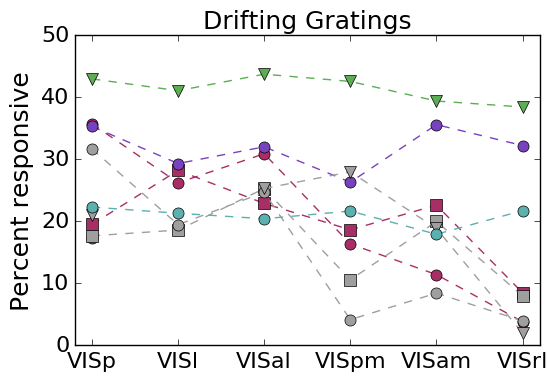

In [167]:
plot_CAL_comparison(results, 'Percent responsive', flag='percent')
plt.ylim(0,50)
plt.yticks(range(0,51,10))
plt.title("Drifting Gratings", fontsize=18)

In [ ]:
print len(tf)

In [111]:
table_all.rename(columns={'specimen_id':'cell_specimen_id'}, inplace=True)

In [86]:
# metrics[metrics.specimen_id==517482153]
metrics[metrics.cell_specimen_id==517482153]

,Unnamed: 0,Unnamed: 0.1,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,...,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name,depth_range
8065,8065,8065,True,VISl,517482153,Rbp4-Cre_KL100/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511511089,False,0.48416,...,0.303295,0.29925,0.23275,177838435,Rbp4-Cre_KL100,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f),300.0


In [97]:
print 6847/26538.
print 1432/26538.
print 1697/26538.
print 11952/26538.

0.258007385636
0.0539603587309
0.0639460396413
0.450373049966


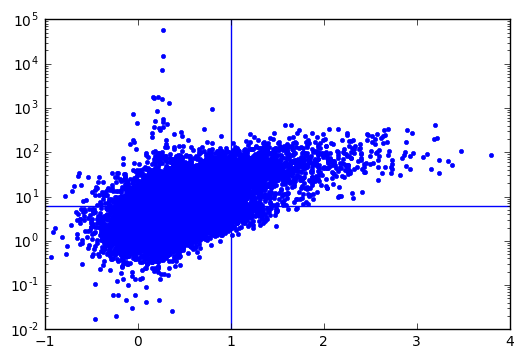

In [49]:
plt.plot(table_all.reliability, table_all.peak_dff, '.')
# plt.ylim(0,100)
plt.yscale('log')
plt.axhline(y=6)
plt.axvline(x=1)

(-10, 200)

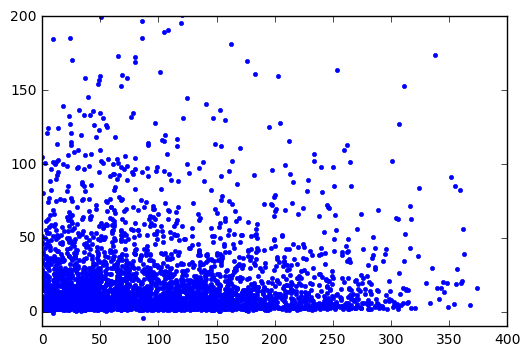

In [56]:
plt.plot(table_all[table_all.andermann==True].peak_dff, '.')
plt.ylim(-10,200)

In [49]:
print len(table_all[(table_all.reliability>1)])

975


In [18]:
print len(table_all[(table_all.andermann==True)&(table_all.marshel==True)])

1432


In [13]:
print len(table_all)
print len(table_all[table_all.dsi<0])


26538
658


In [14]:
print table_all[table_all.andermann==True].pref_tf.mean()
print table_all[table_all.marshel==True].pref_tf.mean()
print table_all[table_all.tohmi==True].pref_tf.mean()
print table_all[table_all.roth==True].pref_tf.mean()

4.0198627136
4.52374301676
4.52958626691
4.3889216264


In [55]:
tf_table = pd.merge(tf_table, metrics[['cell_specimen_id','experiment_container_id','imaging_depth','area','tld1_name','depth_range','p_dg']], on='cell_specimen_id')

In [112]:
tf_table = pd.merge(table_all, metrics[['cell_specimen_id','p_dg']], on='cell_specimen_id')

In [56]:
len(tf_table)

26538

In [116]:
tf_table.to_csv(r'/Users/saskiad/Documents/Data/CAM/tf_table_ds.csv')

In [6]:
tf_table = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/tf_table_ds.csv')

In [10]:
data_input = tf_table
results = np.empty((6,6,3,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            results[c,a,d,0] = len(subset[subset.andermann])
            results[c,a,d,1] = len(subset[(np.isfinite(subset.p_dg))])
            results[c,a,d,2] = 100*(results[c,a,d,0]/float(results[c,a,d,1]))

/Users/saskiad/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars


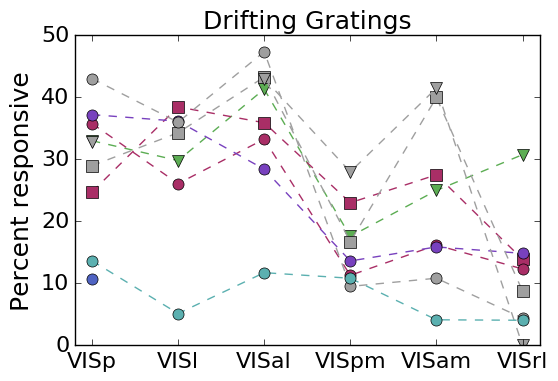

In [13]:
plot_CAL_comparison(results, 'Percent responsive', flag='percent')
# plt.ylim(0,50)
# plt.yticks(range(0,51,10))
plt.title("Drifting Gratings", fontsize=18)

### Data can be found here:  r'\\\aibsdata\neuralcoding\Saskia\TF for Natalia\tf_table.csv'

In [3]:
visp = tf_table[(tf_table.area=='VISp')]
visl = tf_table[(tf_table.area=='VISl')]
vispm = tf_table[(tf_table.area=='VISpm')]
visal = tf_table[(tf_table.area=='VISal')]

In [4]:
print len(visp)
print len(visp[visp.andermann==True])
print len(visp[visp.marshel==True])
print len(visp[visp.tohmi==True])
print len(visp[visp.roth==True])

11198
3680
2032
10836
901


In [5]:
print visp[visp.andermann==True].pref_tf.mean()
print visp[visp.marshel==True].pref_tf.mean()
print visp[visp.tohmi==True].pref_tf.mean()
print visp[visp.roth==True].pref_tf.mean()

3.59184782609
4.21210629921
3.9377076412
4.40621531632


In [53]:
def metric_compare(data_input, metric_name):
    results = np.empty((6,4,3,3))
    for a, area in enumerate(areas):
        for c, cre in enumerate(cres):
            for d, depth in enumerate(depths):
                subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
                if len(subset)==0:
                    results[c,a,d,:] = [np.NaN, np.NaN,0]
                else:
                    results[c,a,d,0] = subset[metric_name].mean()
                    results[c,a,d,1] = subset[metric_name].std()/np.sqrt(len(subset))
                    results[c,a,d,2] = len(subset)
    return results

In [51]:
colors = {}
colors['Rbp4-Cre_KL100'] = '#5cad53'
colors['Cux2-CreERT2'] = '#a92e66'
colors['Rorb-IRES2-Cre'] = '#7841be'
colors['Scnn1a-Tg3-Cre'] = '#4f63c2'
colors['Nr5a1-Cre'] = '#5bb0b0'
colors['Emx1-IRES-Cre'] = '#9f9f9f'
areas = ['VISp','VISl','VISal','VISpm']
depths = [100,200,300]
cres = ['Rbp4-Cre_KL100', 'Cux2-CreERT2', 'Rorb-IRES2-Cre','Scnn1a-Tg3-Cre', 'Emx1-IRES-Cre', 'Nr5a1-Cre']
markers = {}
markers[100] = 's--'
markers[200] = 'o--'
markers[300] = 'v--'

In [52]:
def plot_CAL_comparison(metric_name, value_flag='mean'):
    if value_flag == 'mean':
        results = metric_compare(tf_table, 'pref_tf')
    elif value_flag == 'median':
        results = metric_compare_median(tf_table, 'pref_tf')
    elif value_flag == 'geometric_mean':
        results = metric_compare_geometric_mean(tf_table, 'pref_tf')
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            color = colors[cres[c]]
            marker = markers[depths[d]]
            plt.errorbar(range(4), results[c,:,d,0], yerr=results[c,:,d,1], fmt=marker, color=color, markersize=10)
    plt.xlim(-0.2, 3.2)
    plt.xticks(range(4), areas)
    plt.ylabel(metric_name, fontsize=18)
    plt.tick_params(labelsize=16)

In [57]:
results = metric_compare(tf_table, 'pref_tf')

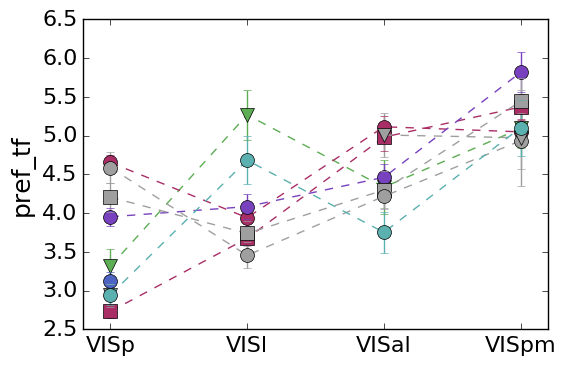

In [58]:
plot_CAL_comparison('pref_tf')

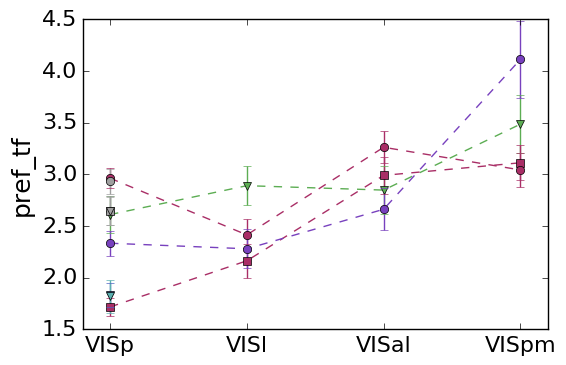

In [66]:
plot_CAL_comparison('pref_tf', value_flag='geometric_mean')

In [17]:
def metric_compare_median(data_input, metric_name):
    areas = ['VISp','VISl','VISal','VISpm']
    depths = [100,200,300]
    cres = ['Rbp4-Cre_KL100', 'Cux2-CreERT2', 'Rorb-IRES2-Cre','Scnn1a-Tg3-Cre', 'Emx1-IRES-Cre', 'Nr5a1-Cre']
    results = np.empty((6,4,3,3))
    for a, area in enumerate(areas):
        for c, cre in enumerate(cres):
            for d, depth in enumerate(depths):
                subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
                if len(subset)==0:
                    results[c,a,d,:] = [np.NaN, np.NaN,0]
                else:
                    results[c,a,d,0] = subset[metric_name].median()
                    results[c,a,d,1] = subset[metric_name].std()/np.sqrt(len(subset))
                    results[c,a,d,2] = len(subset)
    return results

In [65]:
def metric_compare_geometric_mean(data_input, metric_name):
    areas = ['VISp','VISl','VISal','VISpm']
    depths = [100,200,300]
    cres = ['Rbp4-Cre_KL100', 'Cux2-CreERT2', 'Rorb-IRES2-Cre','Scnn1a-Tg3-Cre', 'Emx1-IRES-Cre', 'Nr5a1-Cre']
    results = np.empty((6,4,3,3))
    for a, area in enumerate(areas):
        for c, cre in enumerate(cres):
            for d, depth in enumerate(depths):
                subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
                if len(subset)==0:
                    results[c,a,d,:] = [np.NaN, np.NaN,0]
                else:
                    results[c,a,d,0] = st.gmean(subset[metric_name])
                    results[c,a,d,1] = subset[metric_name].std()/np.sqrt(len(subset))
                    results[c,a,d,2] = len(subset)
    return results

In [28]:
results = metric_compare(tf_table, 'pref_tf', True)

In [108]:
results[1,:,0,0]

array([ 2.75678798,  3.72582781,  4.7846568 ,  5.36445783])

In [59]:
anderman_tf = metric_compare(tf_table[tf_table.andermann==True], 'pref_tf')
marshel_tf = metric_compare(tf_table[tf_table.marshel==True], 'pref_tf')
tohmi_tf = metric_compare(tf_table[tf_table.tohmi==True], 'pref_tf')
roth_tf = metric_compare(tf_table[tf_table.roth==True], 'pref_tf')

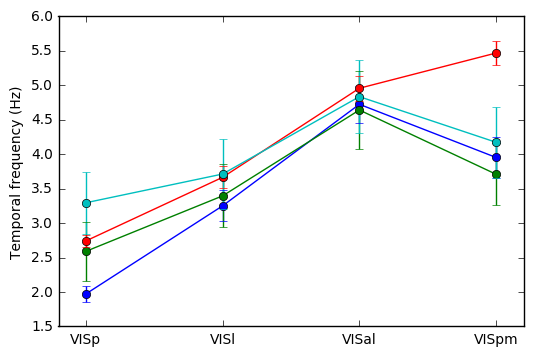

In [60]:
plt.errorbar(range(4),anderman_tf[1,:,0,0], yerr=anderman_tf[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf[1,:,0,0], yerr=marshel_tf[1,:,0,1], fmt='o-')
plt.errorbar(range(4),tohmi_tf[1,:,0,0], yerr=tohmi_tf[1,:,0,1], fmt='o-')
plt.errorbar(range(4),roth_tf[1,:,0,0], yerr=roth_tf[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

In [10]:
anderman_tf_0 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==0)], 'pref_tf')
anderman_tf_45 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==45)], 'pref_tf')
anderman_tf_90 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==90)], 'pref_tf')
anderman_tf_135 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==135)], 'pref_tf')
anderman_tf_180 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==180)], 'pref_tf')
anderman_tf_225 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==225)], 'pref_tf')
anderman_tf_270 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==270)], 'pref_tf')
anderman_tf_315 = metric_compare(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==315)], 'pref_tf')

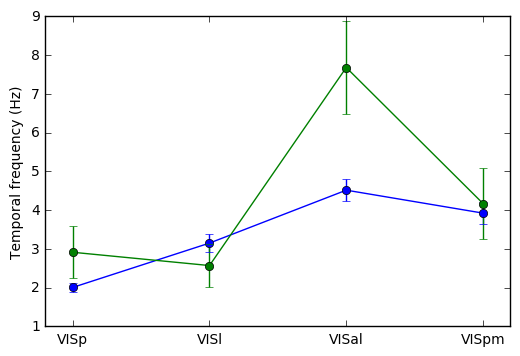

In [11]:
plt.errorbar(range(4),anderman_tf[1,:,0,0], yerr=anderman_tf[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_270[1,:,0,0], yerr=anderman_tf_270[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

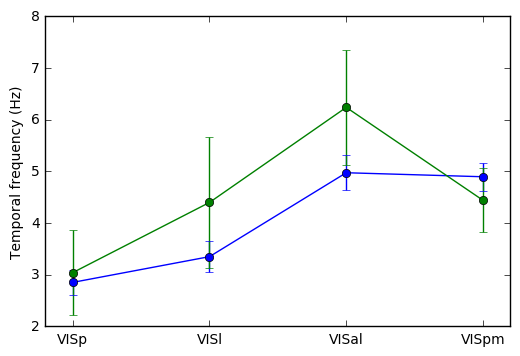

In [134]:
plt.errorbar(range(4),marshel_tf[1,:,0,0], yerr=marshel_tf[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_90[1,:,0,0], yerr=marshel_tf_90[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

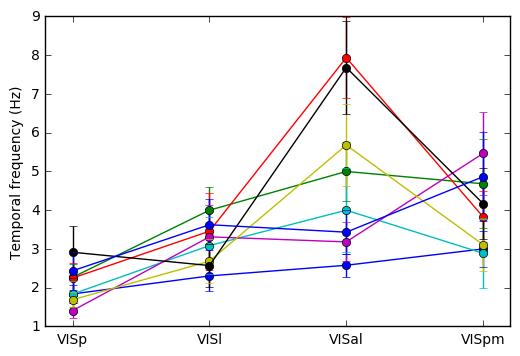

In [12]:
plt.errorbar(range(4),anderman_tf_0[1,:,0,0], yerr=anderman_tf_0[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_45[1,:,0,0], yerr=anderman_tf_45[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_90[1,:,0,0], yerr=anderman_tf_90[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_135[1,:,0,0], yerr=anderman_tf_135[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_180[1,:,0,0], yerr=anderman_tf_180[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_225[1,:,0,0], yerr=anderman_tf_225[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_270[1,:,0,0], yerr=anderman_tf_270[1,:,0,1], fmt='o-')
plt.errorbar(range(4),anderman_tf_315[1,:,0,0], yerr=anderman_tf_315[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

In [153]:
orivals=range(0,360,45)
orivals

[0, 45, 90, 135, 180, 225, 270, 315]

In [166]:
print tf_table.tld1_name.unique()

['Rbp4-Cre_KL100' 'Cux2-CreERT2' 'Rorb-IRES2-Cre' 'Scnn1a-Tg3-Cre'
 'Emx1-IRES-Cre' 'Nr5a1-Cre']


In [167]:
andermann_tf = np.empty((8,2))
for i,v in enumerate(orivals):
    temp = tf_table[(tf_table.andermann==True)&(tf_table.area=='VISal')&(tf_table.tld1_name=='Cux2-CreERT2')&(tf_table.pref_ori==v)]
    print len(temp)
    andermann_tf[i,0] = temp.pref_tf.mean()
    andermann_tf[i,1] = temp.pref_tf.std()/np.sqrt(len(temp))


96
82
67
53
83
58
75
77


In [310]:
marshel2_tf = np.empty((8,2))
for i,v in enumerate(orivals):
    temp = tf_table[(tf_table.marshel==True)&(tf_table.area=='VISal')&(tf_table.tld1_name=='Cux2-CreERT2')&(tf_table.pref_ori==v)]
    print len(temp)
    marshel2_tf[i,0] = temp.pref_tf.mean()
    marshel2_tf[i,1] = temp.pref_tf.std()/np.sqrt(len(temp))


40
34
40
27
32
42
33
36


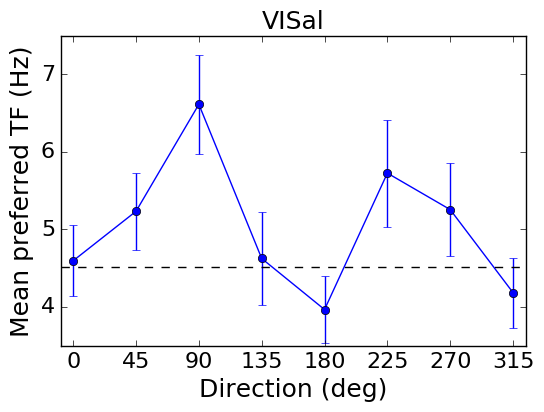

In [170]:
plt.errorbar(range(8), andermann_tf[:,0], yerr=andermann_tf[:,1], fmt='o-')
plt.xlim(-0.2, 7.2)
plt.xticks(range(8), orivals)
plt.yticks([4,5,6,7])
plt.xlabel("Direction (deg)", fontsize=18)
plt.ylabel("Mean preferred TF (Hz)", fontsize=18)
plt.title("VISal", fontsize=18)
plt.tick_params(labelsize=16)
plt.axhline(y=tf_table[(tf_table.andermann==True)&(tf_table.imaging_depth==175)&(tf_table.area=='VISal')&(tf_table.tld1_name=='Cux2-CreERT2')].pref_tf.mean(), color='k', ls='--')

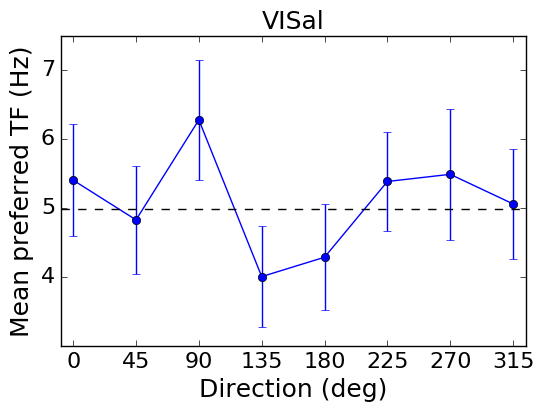

In [311]:
plt.errorbar(range(8), marshel2_tf[:,0], yerr=marshel2_tf[:,1], fmt='o-')
plt.xlim(-0.2, 7.2)
plt.xticks(range(8), orivals)
plt.yticks([4,5,6,7])
plt.xlabel("Direction (deg)", fontsize=18)
plt.ylabel("Mean preferred TF (Hz)", fontsize=18)
plt.title("VISal", fontsize=18)
plt.tick_params(labelsize=16)
plt.axhline(y=tf_table[(tf_table.marshel==True)&(tf_table.imaging_depth==175)&(tf_table.area=='VISal')&(tf_table.tld1_name=='Cux2-CreERT2')].pref_tf.mean(), color='k', ls='--')

In [13]:
marshel_tf_0 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==0)], 'pref_tf')
marshel_tf_45 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==45)], 'pref_tf')
marshel_tf_90 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==90)], 'pref_tf')
marshel_tf_135 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==135)], 'pref_tf')
marshel_tf_180 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==180)], 'pref_tf')
marshel_tf_225 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==225)], 'pref_tf')
marshel_tf_270 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==270)], 'pref_tf')
marshel_tf_315 = metric_compare(tf_table[(tf_table.marshel==True)&(tf_table.pref_ori==315)], 'pref_tf')

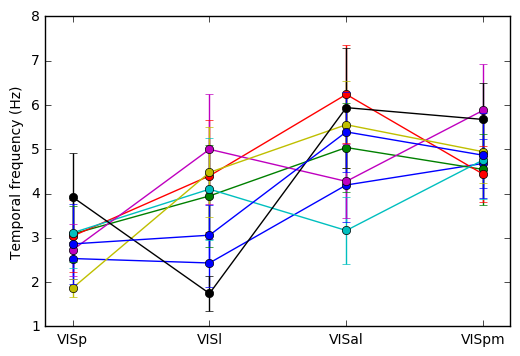

In [14]:
plt.errorbar(range(4),marshel_tf_0[1,:,0,0], yerr=marshel_tf_0[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_45[1,:,0,0], yerr=marshel_tf_45[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_90[1,:,0,0], yerr=marshel_tf_90[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_135[1,:,0,0], yerr=marshel_tf_135[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_180[1,:,0,0], yerr=marshel_tf_180[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_225[1,:,0,0], yerr=marshel_tf_225[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_270[1,:,0,0], yerr=marshel_tf_270[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_315[1,:,0,0], yerr=marshel_tf_315[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

(-0.2, 3.2)

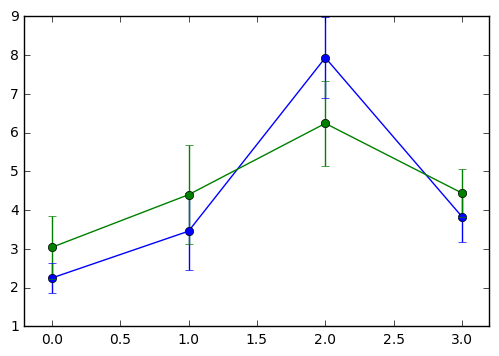

In [130]:
plt.errorbar(range(4),anderman_tf_90[1,:,0,0], yerr=anderman_tf_90[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_90[1,:,0,0], yerr=marshel_tf_90[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)

(-0.2, 3.2)

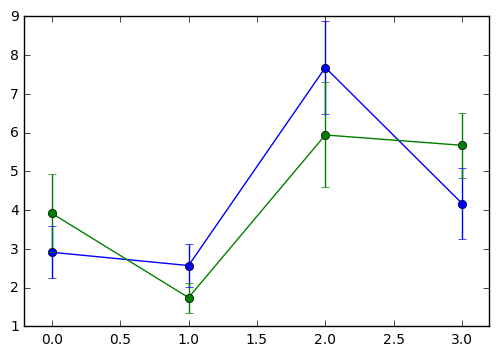

In [131]:
plt.errorbar(range(4),anderman_tf_270[1,:,0,0], yerr=anderman_tf_270[1,:,0,1], fmt='o-')
plt.errorbar(range(4),marshel_tf_270[1,:,0,0], yerr=marshel_tf_270[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)

In [101]:
print len(tf_table[tf_table.andermann==True])
print len(tf_table[tf_table.marshel==True])
# print len(tf_table[tf_table.roth==True])
print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)])
# print len(tf_table[(tf_table.andermann==True)&(tf_table.roth==True)])
# print len(tf_table[(tf_table.roth==True)&(tf_table.marshel==True)])
# print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)&(tf_table.roth==True)])

5881
3307
1679


In [16]:
print len(tf_table)

18814


In [130]:
print 5881-1679
print 3307-1679

4202
1628


In [18]:
intersection = tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)]

In [21]:
inter_tf_0 = metric_compare(intersection[(intersection.pref_ori==0)], 'pref_tf')
inter_tf_45 = metric_compare(intersection[(intersection.pref_ori==45)], 'pref_tf')
inter_tf_90 = metric_compare(intersection[(intersection.pref_ori==90)], 'pref_tf')
inter_tf_135 = metric_compare(intersection[(intersection.pref_ori==135)], 'pref_tf')
inter_tf_180 = metric_compare(intersection[(intersection.pref_ori==180)], 'pref_tf')
inter_tf_225 = metric_compare(intersection[(intersection.pref_ori==225)], 'pref_tf')
inter_tf_270 = metric_compare(intersection[(intersection.pref_ori==270)], 'pref_tf')
inter_tf_315 = metric_compare(intersection[(intersection.pref_ori==315)], 'pref_tf')

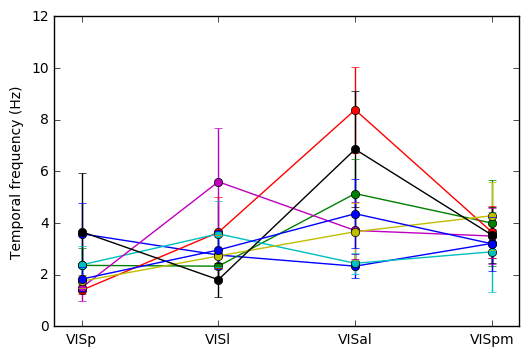

In [24]:
plt.errorbar(range(4),inter_tf_0[1,:,0,0], yerr=inter_tf_0[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_45[1,:,0,0], yerr=inter_tf_45[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_90[1,:,0,0], yerr=inter_tf_90[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_135[1,:,0,0], yerr=inter_tf_135[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_180[1,:,0,0], yerr=inter_tf_180[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_225[1,:,0,0], yerr=inter_tf_225[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_270[1,:,0,0], yerr=inter_tf_270[1,:,0,1], fmt='o-')
plt.errorbar(range(4),inter_tf_315[1,:,0,0], yerr=inter_tf_315[1,:,0,1], fmt='o-')
plt.xlim(-0.2, 3.2)
plt.xticks(range(4),['VISp','VISl','VISal','VISpm'] )
plt.ylabel("Temporal frequency (Hz)")

In [72]:
metrics = pd.read_csv(r'/Users/saskiad/Documents/Data/CAM/metrics_October_trim.csv')

In [73]:
metrics = pd.merge(metrics, tf_table, how='outer', on='specimen_id')

In [10]:
def metric_compare(data_input, metric_name):
    results = np.empty((6,4,3,3))
    for a, area in enumerate(areas):
        for c, cre in enumerate(cres):
            for d, depth in enumerate(depths):
                subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
                if len(subset)==0:
                    results[c,a,d,:] = [np.NaN, np.NaN,0]
                else:
                    results[c,a,d,0] = subset[metric_name].mean()
                    results[c,a,d,1] = subset[metric_name].std()/np.sqrt(len(subset))
                    results[c,a,d,2] = len(subset)
    return results

In [88]:
and_osi = metric_compare(metrics[metrics.andermann==True], 'osi_dg')
marsh_osi = metric_compare(metrics[metrics.marshel==True], 'osi_dg')

In [11]:
def plot_CAL_comparison(results, metric_name):
    
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            color = colors[cres[c]]
            marker = markers[depths[d]]
            plt.errorbar(range(4), results[c,:,d,0], yerr=results[c,:,d,1], fmt=marker, color=color, markersize=8)
    plt.xlim(-0.2, 3.2)
    plt.xticks(range(4), areas)
    plt.ylabel(metric_name, fontsize=18)
    plt.tick_params(labelsize=16)

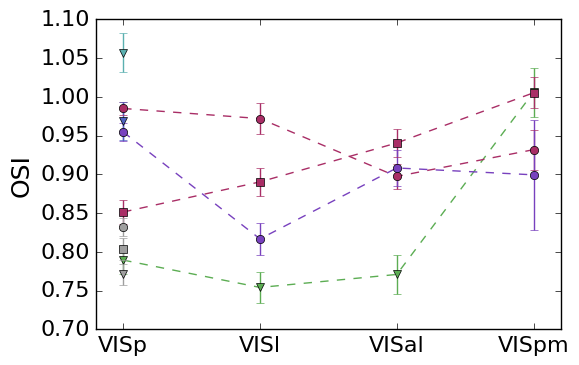

In [93]:
plot_CAL_comparison(and_osi, 'OSI')

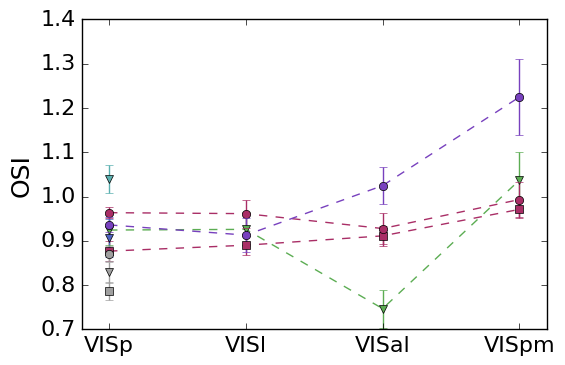

In [95]:
plot_CAL_comparison(marsh_osi, 'OSI')

In [96]:
and_dsi = metric_compare(metrics[metrics.andermann==True], 'dsi_dg')
marsh_dsi = metric_compare(metrics[metrics.marshel==True], 'dsi_dg')

(0, 1)

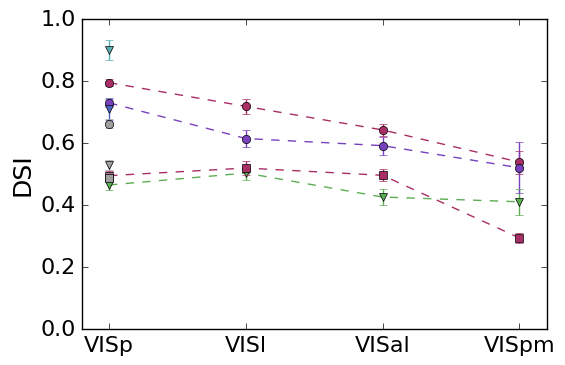

In [99]:
plot_CAL_comparison(and_dsi, 'DSI')
plt.ylim(0,1)

(0, 1)

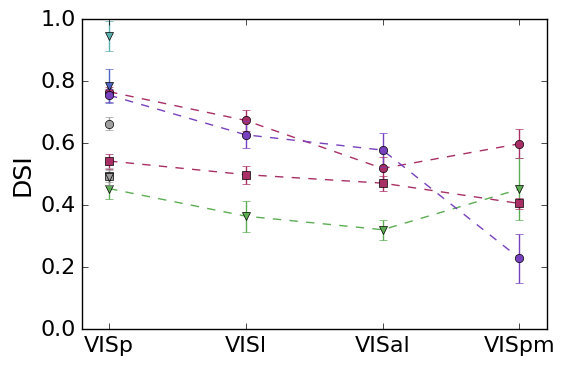

In [100]:
plot_CAL_comparison(marsh_dsi, 'DSI')
plt.ylim(0,1)

In [190]:
print len(tf_table[tf_table.andermann==True])
print len(tf_table[tf_table.marshel==True])
print len(tf_table[tf_table.roth==True])
print len(tf_table[tf_table.tohmi==True])
print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)])
print len(tf_table[(tf_table.andermann==True)&(tf_table.roth==True)])
print len(tf_table[(tf_table.roth==True)&(tf_table.marshel==True)])
print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)&(tf_table.roth==True)])

5881
3307
1415
18073
1679
1390
908
908


In [447]:
print len(tf_table[(tf_table.marshel==True)&(tf_table.roth==True)&(tf_table.sun==True)])

908


In [451]:
print len(tf_table[(tf_table.andermann==True)&(tf_table.marshel==True)&(tf_table.sun==True)&(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)])


1089


In [103]:
len(tf_table)

18814

In [104]:
len(tf_table[np.isnan(tf_table.andermann)])

0

In [173]:
print 5881/18814.
print 3307/18814.
print 1679/18814.
print 0.3126*0.1758

0.312586371851
0.175773360264
0.0892420537897
0.05495508


In [127]:
test1 = np.random.randint(0, high=18814, size=5881)
test2 = np.random.randint(0, high=18814, size=3307)

In [128]:
len(np.where(np.in1d(test1,test2))[0])

1017

In [174]:
print len(visp[(visp.andermann==True)])

11198

In [175]:
temp = metrics[(metrics.area_x=='VISp')&(metrics.andermann==True)]

In [277]:
print tf_table[(tf_table.area=='VISp')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISp')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISp')&(tf_table.roth==True)].dsi.mean()
print tf_table[(tf_table.area=='VISp')&(tf_table.tohmi==True)].dsi.mean()
print tf_table[(tf_table.area=='VISp')&(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)].dsi.mean()

0.637154931573
0.660844964633
0.741766254411
0.686607992411
0.688621194991


In [278]:
print tf_table[(tf_table.area=='VISp')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.andermann==True)].dsi.mean()

0.637154931573
0.584188901979
0.56014752701
0.381605585871


In [279]:
print tf_table[(tf_table.area=='VISp')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.marshel==True)].dsi.mean()

0.660844964633
0.596186753266
0.516191000435
0.511057321323


In [296]:
for index, row in tf_table.iterrows():
    if np.logical_or(row.tld1_name=='Nr5a1-Cre', row.tld1_name=='Scnn1a-Tg3-Cre'):
        tf_table.depth_range.loc[index] = 200

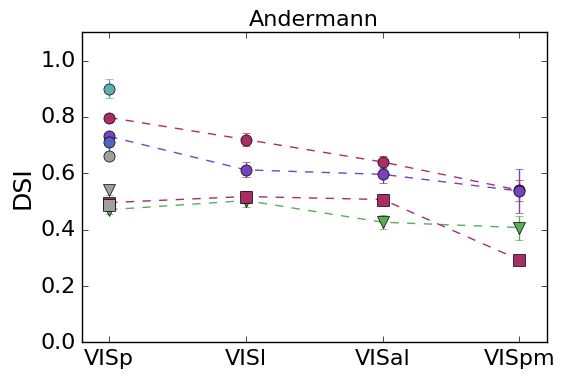

In [303]:
and_dsi = metric_compare(tf_table[tf_table.andermann==True], 'dsi')
plot_CAL_comparison(and_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("Andermann", fontsize=16)

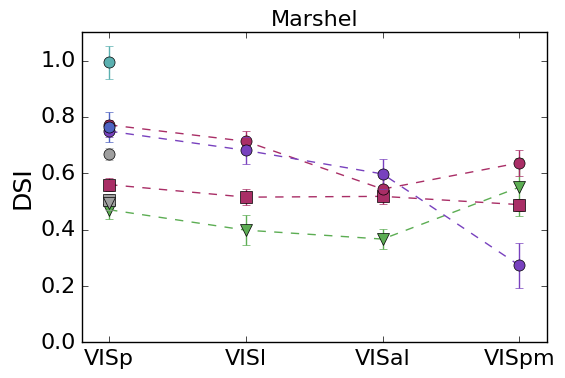

In [304]:
marsh_dsi = metric_compare(tf_table[tf_table.marshel==True], 'dsi')
plot_CAL_comparison(marsh_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("Marshel", fontsize=16)

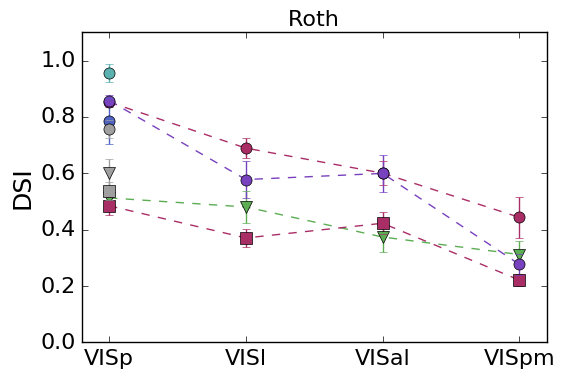

In [305]:
roth_dsi = metric_compare(tf_table[tf_table.roth==True], 'dsi')
plot_CAL_comparison(roth_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("Roth", fontsize=16)

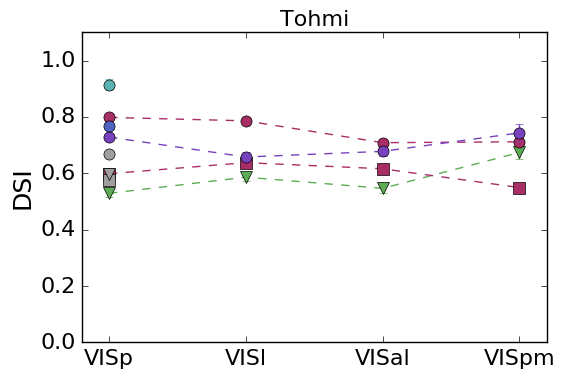

In [306]:
tohmi_dsi = metric_compare(tf_table[tf_table.tohmi==True], 'dsi')
plot_CAL_comparison(tohmi_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("Tohmi", fontsize=16)

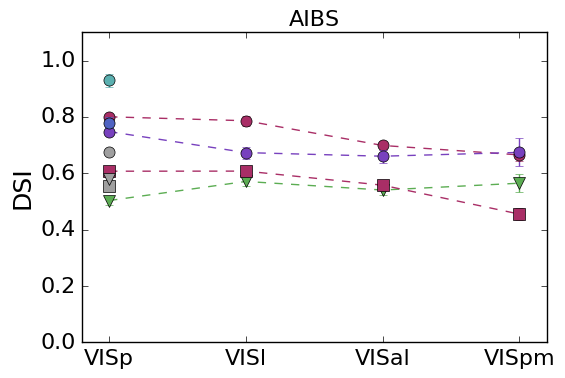

In [307]:
aibs_dsi = metric_compare(tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)], 'dsi')
plot_CAL_comparison(aibs_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("AIBS", fontsize=16)

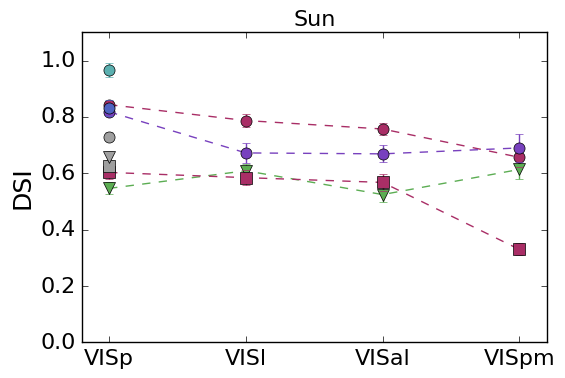

In [335]:
sun_dsi = metric_compare(tf_table[tf_table.sun==True], 'dsi')
plot_CAL_comparison(sun_dsi, 'DSI')
plt.ylim(0, 1.1)
plt.title("Sun", fontsize=16)

In [336]:
thr=0.5
print len(tf_table[(tf_table.area=='VISp')&(tf_table.andermann==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))
print len(tf_table[(tf_table.area=='VISp')&(tf_table.marshel==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))
print len(tf_table[(tf_table.area=='VISp')&(tf_table.roth==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))
print len(tf_table[(tf_table.area=='VISp')&(tf_table.tohmi==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))
print len(tf_table[(tf_table.area=='VISp')&(tf_table.sun==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))
print len(tf_table[(tf_table.area=='VISp')&(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')]))



0.20494731202
0.106983389891
0.0605465261654
0.588230041079
0.177710305412
0.367744240043


In [337]:
print len(tf_table[(tf_table.area=='VISp')&(tf_table.sun==True)&(tf_table.dsi>thr)])/float(len(tf_table[(tf_table.area=='VISp')&(tf_table.sun==True)]))

0.754931714719


In [315]:
print tf_table[(tf_table.area=='VISp')&(tf_table.andermann==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.andermann==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.andermann==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.andermann==True)&(tf_table.pref_ori==90)].dsi.mean()

0.601707922196
0.534210212288
0.603293268379
0.380281305605


In [317]:
print tf_table[(tf_table.area=='VISp')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.andermann==True)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.andermann==True)].dsi.mean()

0.637154931573
0.584188901979
0.56014752701
0.381605585871


In [316]:
print tf_table[(tf_table.area=='VISp')&(tf_table.marshel==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.marshel==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.marshel==True)&(tf_table.pref_ori==90)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.marshel==True)&(tf_table.pref_ori==90)].dsi.mean()

0.653454092126
0.53819663415
0.468463955139
0.533715684975


In [318]:
print tf_table[(tf_table.area=='VISp')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISl')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISal')&(tf_table.marshel==True)].dsi.mean()
print tf_table[(tf_table.area=='VISpm')&(tf_table.marshel==True)].dsi.mean()

0.660844964633
0.596186753266
0.516191000435
0.511057321323


In [454]:
and_dir = np.empty((8,3))
for d,depth in enumerate([100,200,300]):
    subset = tf_table[(tf_table.andermann==True)&(tf_table.area=='VISp')&(tf_table.dsi>0.5)&(tf_table.depth_range==depth)]
    for i, ori in enumerate(orivals):
        and_dir[i,d] = len(subset[(subset.pref_ori==ori)])/float(len(subset))

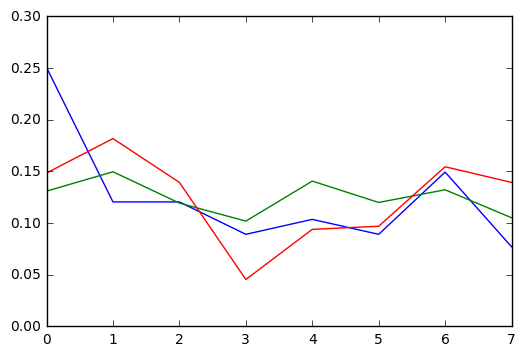

In [455]:
for i in range(3):
    plt.plot(and_dir[:,i])


([<matplotlib.axis.YTick at 0x12c336350>,
 <a list of 5 Text yticklabel objects>)

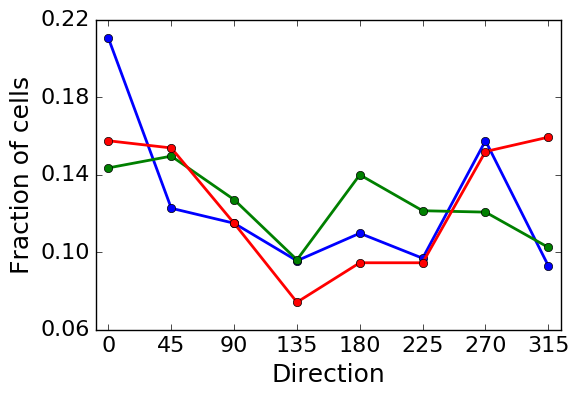

In [463]:
aibs_dir = np.empty((8,3))
for d,depth in enumerate([100,200,300]):
    subset = tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area=='VISp')&(tf_table.dsi>0.5)&(tf_table.depth_range==depth)]
    for i, ori in enumerate(orivals):
        aibs_dir[i,d] = len(subset[(subset.pref_ori==ori)])/float(len(subset))
for i in range(3):
    plt.plot(aibs_dir[:,i], 'o-', lw=2)
plt.xlim(-0.2, 7.2)
plt.xticks(range(8), orivals)
plt.ylabel("Fraction of cells", fontsize=18)
plt.tick_params(labelsize=16)
plt.xlabel("Direction", fontsize=18)
plt.yticks([0.06, 0.1, 0.14, 0.18, 0.22])

In [ ]:
theta = np.radians(orivals)

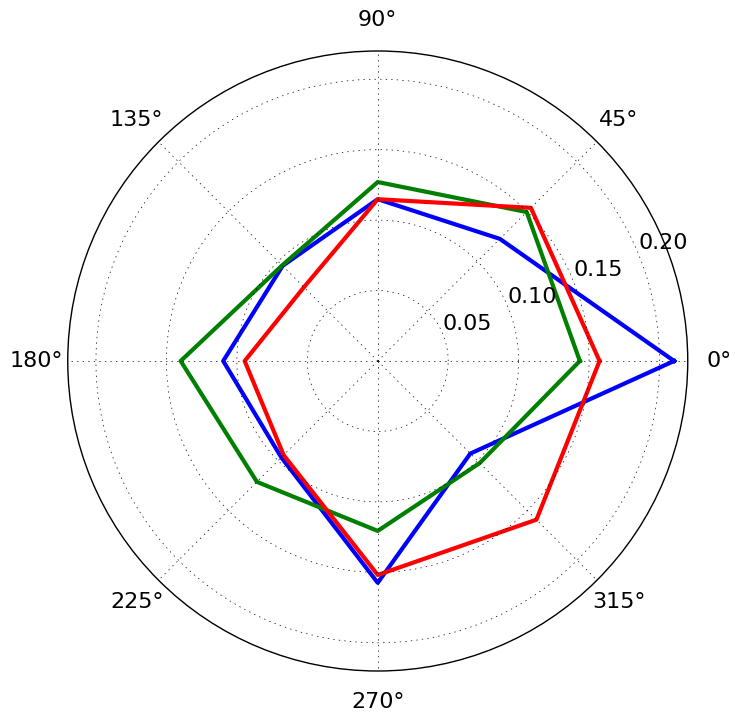

In [478]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, aibs_dir_polar[:,0], lw=3)
ax.plot(theta, aibs_dir_polar[:,1], lw=3)
ax.plot(theta, aibs_dir_polar[:,2], lw=3)
plt.tick_params(labelsize=16)

In [470]:
aibs_dir_polar = np.vstack((aibs_dir, aibs_dir[0,:]))

In [474]:
theta = np.append(theta, 0)

In [479]:
sun_dir = np.empty((8,3))
for d,depth in enumerate([100,200,300]):
    subset = tf_table[(tf_table.sun==True)&(tf_table.area=='VISp')&(tf_table.dsi>0.5)&(tf_table.depth_range==depth)]
    for i, ori in enumerate(orivals):
        sun_dir[i,d] = len(subset[(subset.pref_ori==ori)])/float(len(subset))
sun_dir_polar = np.vstack((sun_dir, sun_dir[0,:]))

(0, 0.2)

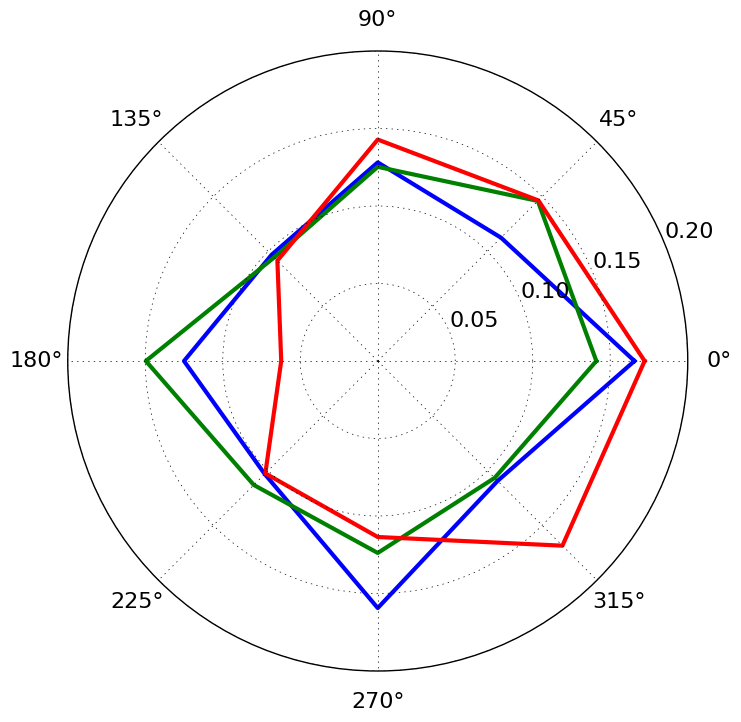

In [482]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, sun_dir_polar[:,0], lw=3)
ax.plot(theta, sun_dir_polar[:,1], lw=3)
ax.plot(theta, sun_dir_polar[:,2], lw=3)
plt.tick_params(labelsize=16)
ax.set_rlim(0,0.2)

In [483]:
roth_dir = np.empty((8,3))
for d,depth in enumerate([100,200,300]):
    subset = tf_table[(tf_table.roth==True)&(tf_table.area=='VISp')&(tf_table.dsi>0.5)&(tf_table.depth_range==depth)]
    for i, ori in enumerate(orivals):
        roth_dir[i,d] = len(subset[(subset.pref_ori==ori)])/float(len(subset))
roth_dir_polar = np.vstack((roth_dir, roth_dir[0,:]))

(0, 0.2)

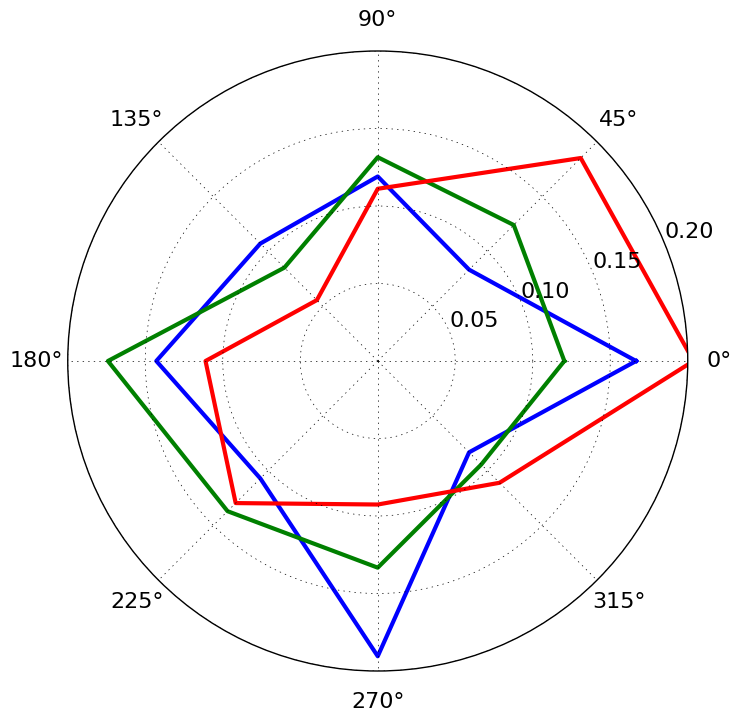

In [484]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, roth_dir_polar[:,0], lw=3)
ax.plot(theta, roth_dir_polar[:,1], lw=3)
ax.plot(theta, roth_dir_polar[:,2], lw=3)
plt.tick_params(labelsize=16)
ax.set_rlim(0,0.2)

In [539]:
areas = ['VISp','VISl','VISal','VISpm']
tf_temp = np.empty((4,8,2))
for j,area in enumerate(areas):
    for i,ori in enumerate(orivals):
        tf_temp[j,i,0]=tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area==area)&(tf_table.pref_ori==ori)&(tf_table.depth_range==100)].pref_tf.mean()
        tf_temp[j,i,1]=tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area==area)&(tf_table.pref_ori==ori)&(tf_table.depth_range==100)].pref_tf.std()/np.sqrt(len(tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area==area)&(tf_table.pref_ori==ori)&(tf_table.depth_range==100)]))
        
        

In [7]:
print tf_table[(tf_table.marshel==True)&(tf_table.area=='VISal')&(tf_table.depth_range==100)].pref_tf.mean()
print tf_table[(tf_table.marshel==True)&(tf_table.area=='VISpm')&(tf_table.depth_range==100)].pref_tf.mean()

4.975
4.89722222222


(1, 9)

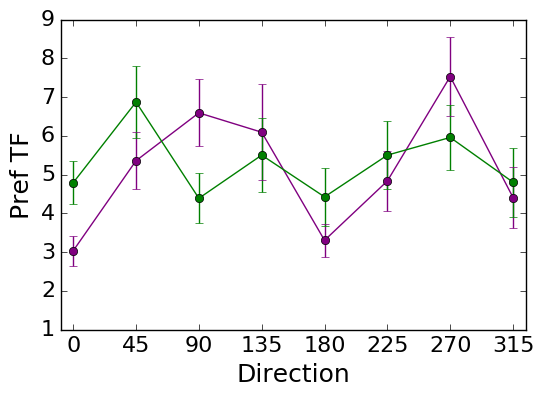

In [540]:
for j in range(2,4):
    if j==2:
        color='purple'
    if j==3:
        color='green'
    plt.errorbar(range(8), tf_temp[j,:,0], yerr=tf_temp[j,:,1], fmt='o-', color=color)
plt.xlim(-0.2, 7.2)
plt.ylabel("Pref TF", fontsize=18)
plt.xlabel("Direction", fontsize=18)
plt.tick_params(labelsize=16)
plt.xticks(range(8), orivals)
plt.ylim(1,9)

In [391]:
areas = ['VISp','VISl','VISal','VISpm']
dsi_temp = np.empty((4,8,2))
for j,area in enumerate(areas):
    for i,ori in enumerate(orivals):
        dsi_temp[j,i,0]=tf_table[(tf_table.andermann==True)&(tf_table.area==area)&(tf_table.pref_ori==ori)].dsi.mean()
        dsi_temp[j,i,1]=tf_table[(tf_table.andermann==True)&(tf_table.area==area)&(tf_table.pref_ori==ori)].dsi.std()/np.sqrt(len(tf_table[(tf_table.marshel==True)&(tf_table.area==area)&(tf_table.pref_ori==ori)]))


(-0.2, 7.2)

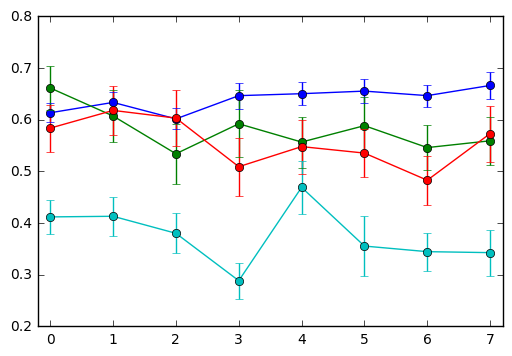

In [392]:
for j in range(4):
    plt.errorbar(range(8), dsi_temp[j,:,0], yerr=dsi_temp[j,:,1], fmt='o-')
plt.xlim(-0.2, 7.2)

In [321]:
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==0)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==45)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==90)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==135)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==180)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==225)&(tf_table.area=='VISal')])
print len(tf_table[(tf_table.andermann==True)&(tf_table.pref_ori==270)&(tf_table.area=='VISal')])

121
125
102
79
121
84
103


In [274]:
for index,row in tf_table.iterrows():
    if row.dsi<0:
        tf_table.dsi.loc[index] = np.NaN
    if row.dsi>2:
        tf_table.dsi.loc[index] = np.NaN

In [199]:
print len(temp)
print len(temp[temp.cv_ds_dg>0])

3680
3598


In [204]:
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)])
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)&(metrics.andermann==True)])
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)&(metrics.marshel==True)])
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)&(metrics.roth==True)])
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)&(metrics.tohmi==True)])

9989
5092
1920
1415
9989


In [225]:
print len(metrics[(metrics.p_dg<0.05)&(metrics.peak_dff_dg>3)&(metrics.roth==True)&(metrics.andermann==True)&(metrics.tohmi==True)])

1390


In [323]:
print len(tf_table[tf_table.roth==True])/float(len(tf_table))

0.0752099500372


In [326]:
tf_table['sun'] = np.NaN
for index, row in tf_table.iterrows():
    if row.peak_dff>10:
        tf_table.sun.loc[index] = True
    else:
        tf_table.sun.loc[index] = False

In [333]:
print len(tf_table[(tf_table.sun==True)&(tf_table.andermann==True)])
print len(tf_table[(tf_table.sun==True)&(tf_table.marshel==True)])
print len(tf_table[(tf_table.sun==True)&(tf_table.roth==True)])
print len(tf_table[(tf_table.sun==True)&(tf_table.tohmi==True)])
print len(tf_table[(tf_table.sun==True)&(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)])

2718
1089
1415
4406
4006


In [334]:
print len(tf_table[(tf_table.sun==True)&(tf_table.andermann==True)&(tf_table.marshel==True)])

1089


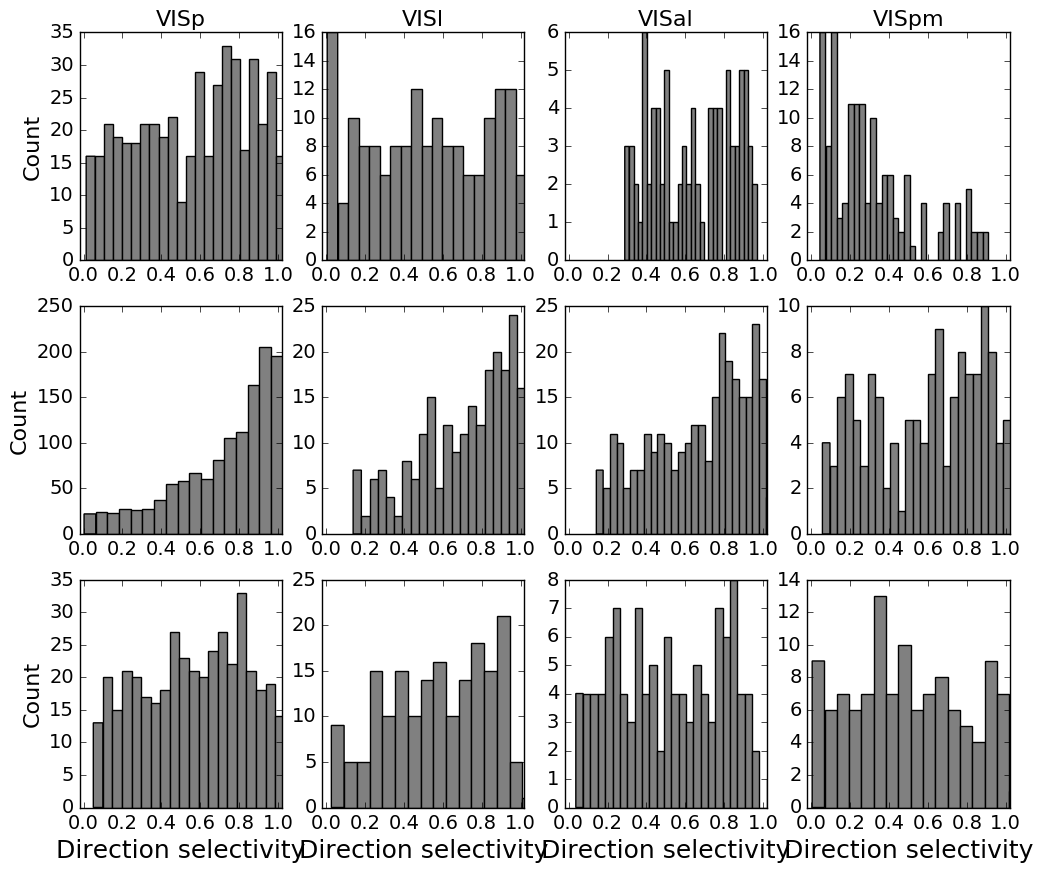

In [393]:
plt.figure(figsize=(12,10))
for d,depth in enumerate(depths):
    for a,area in enumerate(areas):
        plt.subplot(3,4,(4*d)+a+1)
        plt.hist(tf_table[(tf_table.sun==True)&(tf_table.area==area)&(tf_table.depth_range==depth)].dsi, bins=30, color='gray')
        if depth==100:
            plt.title(area, fontsize=16)
        if depth==300:
            plt.xlabel("Direction selectivity", fontsize=18)
        if area=='VISp':
            plt.ylabel("Count", fontsize=16)
        plt.tick_params(labelsize=14)
        plt.xlim(-0.02, 1.02)

In [395]:
print len(tf_table[(tf_table.area=='VISp')&(tf_table.depth_range==200)])
print len(tf_table[(tf_table.depth_range==200)])
print 6629/10473.      

6629
10473
0.632960947198


In [397]:
print len(tf_table[(tf_table.area=='VISp')&(tf_table.depth_range==200)&(tf_table.sun==True)])
print len(tf_table[(tf_table.depth_range==200)&(tf_table.sun==True)])
print 1663/2494.

1663
2494
0.66680032077


In [403]:
and_dsi_mat = np.empty((4,3))
for a,area in enumerate(areas):
    for d,depth in enumerate([100,200,300]):
        test = tf_table[(tf_table.andermann==True)&(tf_table.area==area)&(tf_table.depth_range==depth)]
        and_dsi_mat[a,d] = len(test[test.dsi>0.5])/float(len(test))

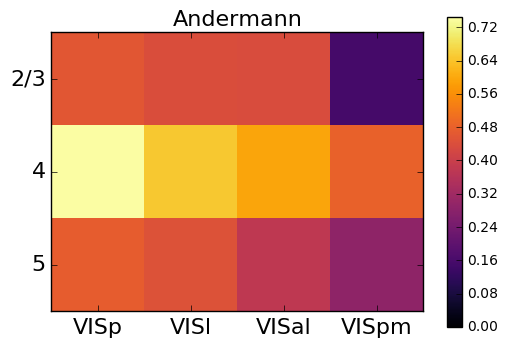

In [443]:
plt.imshow(and_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0)
plt.colorbar()
plt.xticks(range(4), areas)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
plt.title("Andermann", fontsize=16)

In [408]:
marshel_dsi_mat = np.empty((4,3))
for a,area in enumerate(areas):
    for d,depth in enumerate([100,200,300]):
        test = tf_table[(tf_table.marshel==True)&(tf_table.area==area)&(tf_table.depth_range==depth)]
        marshel_dsi_mat[a,d] = len(test[test.dsi>0.5])/float(len(test))

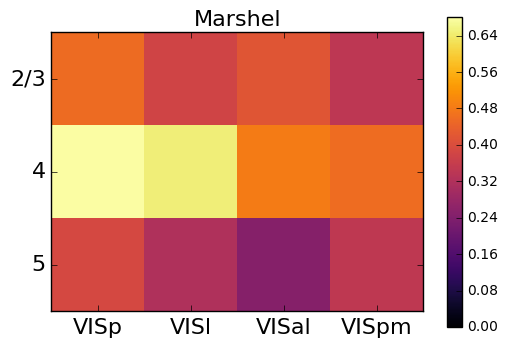

In [442]:
plt.imshow(marshel_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0)
plt.colorbar()
plt.xticks(range(4), areas)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
plt.title("Marshel", fontsize=16)

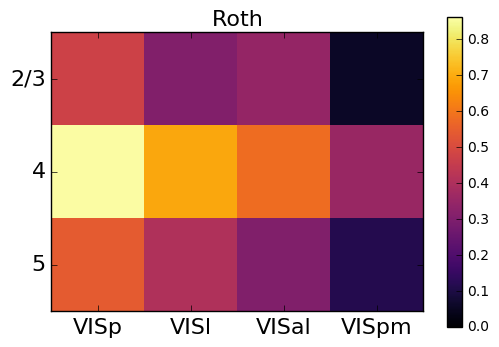

In [441]:
roth_dsi_mat = np.empty((4,3))
for a,area in enumerate(areas):
    for d,depth in enumerate([100,200,300]):
        test = tf_table[(tf_table.roth==True)&(tf_table.area==area)&(tf_table.depth_range==depth)]
        roth_dsi_mat[a,d] = len(test[test.dsi>0.5])/float(len(test))
plt.imshow(roth_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0)
plt.colorbar()
plt.xticks(range(4), areas)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
plt.title("Roth", fontsize=16)

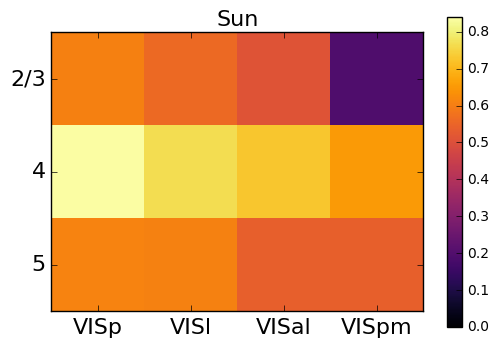

In [440]:
sun_dsi_mat = np.empty((4,3))
for a,area in enumerate(areas):
    for d,depth in enumerate([100,200,300]):
        test = tf_table[(tf_table.sun==True)&(tf_table.area==area)&(tf_table.depth_range==depth)]
        sun_dsi_mat[a,d] = len(test[test.dsi>0.5])/float(len(test))
plt.imshow(sun_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0)
plt.colorbar()
plt.xticks(range(4), areas)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
plt.title("Sun", fontsize=16)

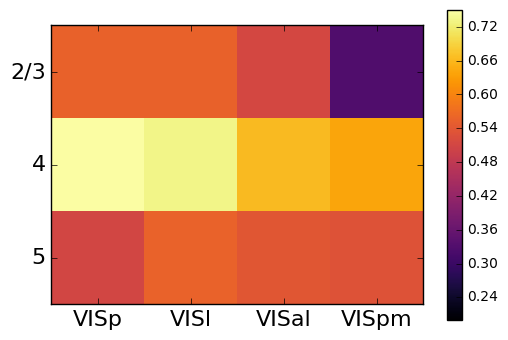

In [429]:
aibs_dsi_mat = np.empty((4,3))
for a,area in enumerate(areas):
    for d,depth in enumerate([100,200,300]):
        test = tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area==area)&(tf_table.depth_range==depth)]
        aibs_dsi_mat[a,d] = len(test[test.dsi>0.5])/float(len(test))
plt.imshow(aibs_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0.2, vmax=0.75)
cbar = plt.colorbar()
plt.xticks(range(4), areas)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
# cbar.set_label("Fraction of responsive cells", fontsize=16, rotation=270)

([], <a list of 0 Text xticklabel objects>)

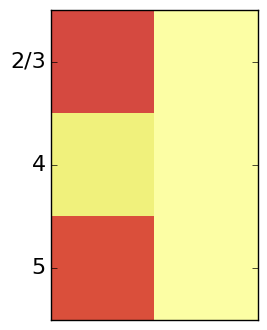

In [432]:
depth_dsi_mat = np.empty((3,2))
for d,depth in enumerate([100,200,300]):
    test = tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.depth_range==depth)]
    depth_dsi_mat[d,0] = len(test[test.dsi>0.5])/float(len(test))
plt.imshow(depth_dsi_mat, cmap='inferno', interpolation='none', vmin=0.2, vmax=0.75)
plt.yticks(range(3), ['2/3','4','5'])
plt.tick_params(labelsize=16)
plt.xticks([])

([], <a list of 0 Text yticklabel objects>)

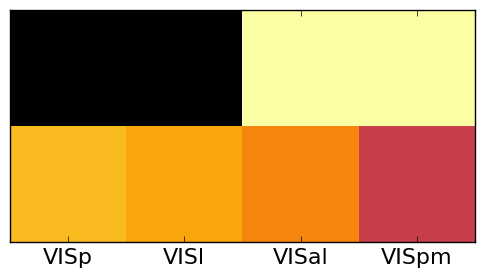

In [435]:
area_dsi_mat = np.empty((4,2))
for a,area in enumerate(areas):
    test = tf_table[(tf_table.p_dg<0.05)&(tf_table.peak_dff>3)&(tf_table.area==area)]
    area_dsi_mat[a,1] = len(test[test.dsi>0.5])/float(len(test))
plt.imshow(area_dsi_mat.T, cmap='inferno', interpolation='none', vmin=0.2, vmax=0.75)
plt.xticks(range(4), areas)
plt.tick_params(labelsize=16)
plt.yticks([])

In [502]:
data_input = tf_table
and_resp = np.empty((6,4,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            if len(subset)==0:
                and_resp[c,a,d] = np.NaN
            else:
                and_resp[c,a,d] = len(subset[subset.andermann==True])/float(len(subset))
and_resp*=100

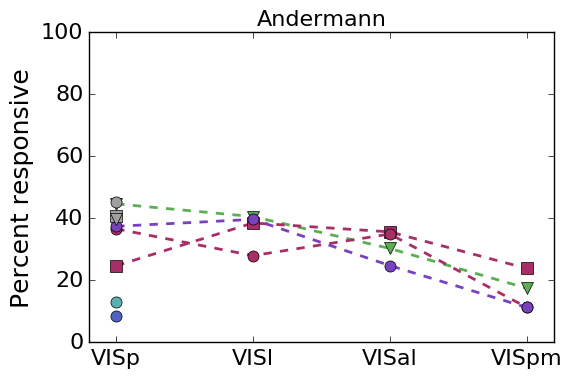

In [511]:
for c, cre in enumerate(cres):
    for d, depth in enumerate(depths):
        color = colors[cres[c]]
        marker = markers[depths[d]]
        plt.plot(range(4), and_resp[c,:,d], marker, color=color, markersize=8, lw=2)
plt.xlim(-0.2, 3.2)
plt.ylim(0,100)
plt.xticks(range(4), areas)
plt.ylabel("Percent responsive" , fontsize=18)
plt.tick_params(labelsize=16)
plt.title("Andermann", fontsize=16)

In [13]:
data_input = tf_table
tohmi_resp = np.empty((6,4,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            if len(subset)==0:
                tohmi_resp[c,a,d] = np.NaN
            else:
                tohmi_resp[c,a,d] = len(subset[subset.tohmi==True])/float(len(subset))
tohmi_resp*=100

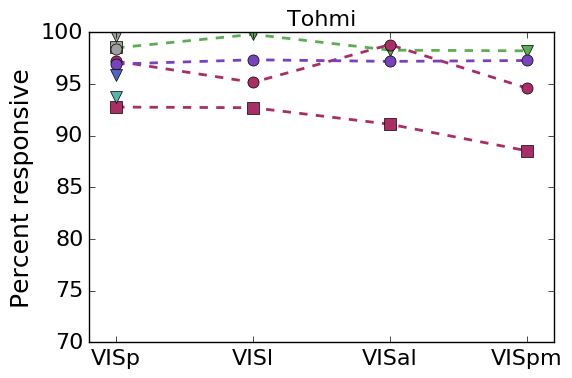

In [16]:
for c, cre in enumerate(cres):
    for d, depth in enumerate(depths):
        color = colors[cres[c]]
        marker = markers[depths[d]]
        plt.plot(range(4), tohmi_resp[c,:,d], marker, color=color, markersize=8, lw=2)
plt.xlim(-0.2, 3.2)
plt.ylim(70,100)
plt.xticks(range(4), areas)
plt.ylabel("Percent responsive" , fontsize=18)
plt.tick_params(labelsize=16)
plt.title("Tohmi", fontsize=16)

In [503]:
data_input = tf_table
marshel_resp = np.empty((6,4,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            if len(subset)==0:
                marshel_resp[c,a,d] = np.NaN
            else:
                marshel_resp[c,a,d] = len(subset[subset.marshel==True])/float(len(subset))
marshel_resp*=100

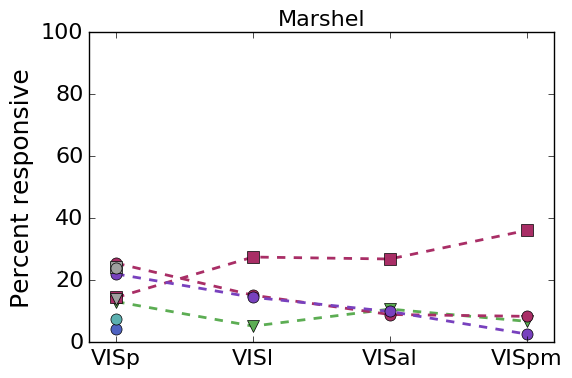

In [510]:
for c, cre in enumerate(cres):
    for d, depth in enumerate(depths):
        color = colors[cres[c]]
        marker = markers[depths[d]]
        plt.plot(range(4), marshel_resp[c,:,d], marker, color=color, markersize=8, lw=2)
plt.xlim(-0.2, 3.2)
plt.ylim(0,100)
plt.xticks(range(4), areas)
plt.ylabel("Percent responsive" , fontsize=18)
plt.tick_params(labelsize=16)
plt.title("Marshel", fontsize=16)

In [505]:
data_input = tf_table
roth_resp = np.empty((6,4,3))
for a, area in enumerate(areas):
    for c, cre in enumerate(cres):
        for d, depth in enumerate(depths):
            subset = data_input[(data_input.area==area)&(data_input.tld1_name==cre)&(data_input.depth_range==depth)]
            if len(subset)==0:
                roth_resp[c,a,d] = np.NaN
            else:
                roth_resp[c,a,d] = len(subset[subset.roth==True])/float(len(subset))
roth_resp*=100

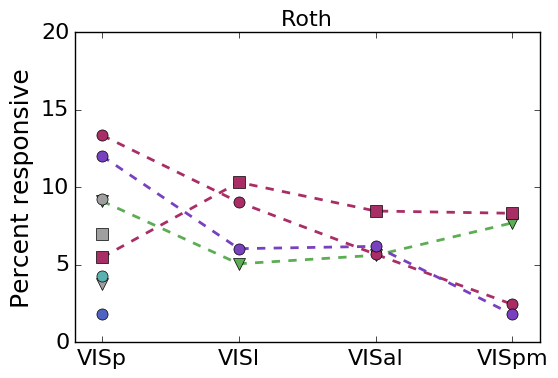

In [509]:
for c, cre in enumerate(cres):
    for d, depth in enumerate(depths):
        color = colors[cres[c]]
        marker = markers[depths[d]]
        plt.plot(range(4), roth_resp[c,:,d], marker, color=color, markersize=8, lw=2)
plt.xlim(-0.2, 3.2)
plt.ylim(0,20)
plt.xticks(range(4), areas)
plt.ylabel("Percent responsive" , fontsize=18)
plt.tick_params(labelsize=16)
plt.title("Roth", fontsize=16)